In [544]:
import pandas as pd 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler




In [545]:
df=pd.read_csv("hacktrain.csv")
df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [546]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [547]:
class_var = df['class']
df.drop('class',axis=1,inplace=True)
df.head()


,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [548]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('ID',axis=1,inplace=True)

In [549]:
ndvi_cols_1 = [col for col in df.columns if col.endswith('_N')]
ndvi_cols_1

['20150720_N',
 '20150602_N',
 '20150517_N',
 '20150501_N',
 '20150415_N',
 '20150330_N',
 '20150314_N',
 '20150226_N',
 '20150210_N',
 '20150125_N',
 '20150109_N',
 '20141117_N',
 '20141101_N',
 '20141016_N',
 '20140930_N',
 '20140813_N',
 '20140626_N',
 '20140610_N',
 '20140525_N',
 '20140509_N',
 '20140423_N',
 '20140407_N',
 '20140322_N',
 '20140218_N',
 '20140202_N',
 '20140117_N',
 '20140101_N']

In [550]:
df['mean_ndvi']=df[ndvi_cols_1].mean(axis=1)
df['median_ndvi']=df[ndvi_cols_1].median(axis=1)
df['std_ndvi']=df[ndvi_cols_1].std(axis=1)
df['max_ndvi']=df[ndvi_cols_1].max(axis=1)
df['min_ndvi']=df[ndvi_cols_1].min(axis=1)
df['range_ndvi']=df['max_ndvi']-df['min_ndvi']
df['ndvi_slope'] = df[ndvi_cols_1[-1]] - df[ndvi_cols_1[0]]
df['ndvi_slope'] = df['ndvi_slope'].fillna(0)  # Or use mean or median instead of 0

df['peak_ndvi_date'] = df[ndvi_cols_1].idxmax(axis=1).str.extract(r'(\d{8})').astype(int)
df['late_minus_early_mean'] = df[ndvi_cols_1].iloc[:, -5:].mean(axis=1) - df[ndvi_cols_1].iloc[:, :5].mean(axis=1)


df.drop(columns=ndvi_cols_1,axis=1,inplace=True)
df.head()

,mean_ndvi,median_ndvi,std_ndvi,max_ndvi,min_ndvi,range_ndvi,ndvi_slope,peak_ndvi_date,late_minus_early_mean
0,-356.566818,239.2330,1100.007185,997.904,-2203.02,3200.924,-203.6890,20150415,-382.049400
1,-252.624381,167.1295,953.792308,914.198,-2250.00,3164.198,-110.1650,20150415,-246.533600
2,-511.704400,58.0174,1158.179688,952.178,-3162.14,4114.318,-1401.5674,20140930,-194.227800
3,-290.295917,219.2285,1053.427212,1232.120,-2829.40,4061.520,-899.2450,20140930,-538.690750
4,553.286190,1020.7200,1289.035547,2158.980,-2646.05,4805.030,-2493.5800,20150314,-1445.480867


In [551]:

df

,mean_ndvi,median_ndvi,std_ndvi,max_ndvi,min_ndvi,range_ndvi,ndvi_slope,peak_ndvi_date,late_minus_early_mean
0,-356.566818,239.2330,1100.007185,997.904,-2203.020,3200.924,-203.6890,20150415,-382.049400
1,-252.624381,167.1295,953.792308,914.198,-2250.000,3164.198,-110.1650,20150415,-246.533600
2,-511.704400,58.0174,1158.179688,952.178,-3162.140,4114.318,-1401.5674,20140930,-194.227800
3,-290.295917,219.2285,1053.427212,1232.120,-2829.400,4061.520,-899.2450,20140930,-538.690750
4,553.286190,1020.7200,1289.035547,2158.980,-2646.050,4805.030,-2493.5800,20150314,-1445.480867
...,...,...,...,...,...,...,...,...,...
7995,922.351818,982.2075,326.097943,1589.000,362.882,1226.118,-774.0410,20141016,-513.467250
7996,1248.993808,1366.8400,557.840451,2178.670,336.289,1842.381,-1663.4140,20141016,-722.804000
7997,1563.116917,1448.1000,639.241970,2780.930,447.868,2333.062,-647.9100,20141101,-11.786000
7998,2318.030304,1626.5400,1722.594557,5833.760,244.594,5589.166,-3077.3940,20140610,-509.335400


In [552]:

label_encoder=LabelEncoder()
y=label_encoder.fit_transform(class_var)


In [553]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42,stratify=y)

In [554]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [555]:
model=LogisticRegression(C=1,multi_class='multinomial',solver='lbfgs',max_iter=500)
model.fit(x_train,y_train)

g:\downloadsl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
g:\downloadsl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=500, multi_class='multinomial')

In [556]:
y_pred=model.predict(x_test)


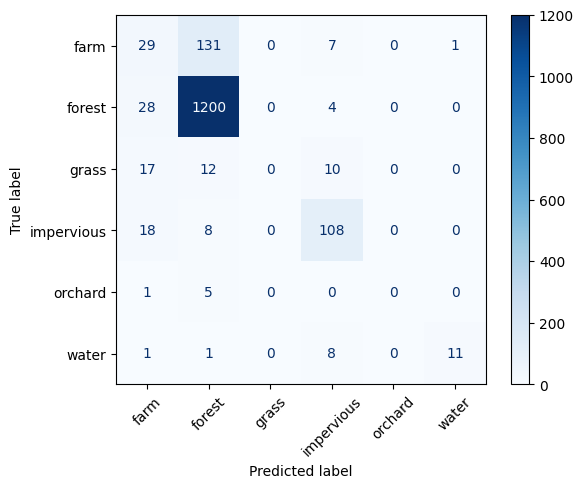

In [557]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)



In [558]:
print(classification_report(y_test,
                            y_pred,
                            labels=list(range(len(label_encoder.classes_))),
                            target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        farm       0.31      0.17      0.22       168
      forest       0.88      0.97      0.93      1232
       grass       0.00      0.00      0.00        39
  impervious       0.79      0.81      0.80       134
     orchard       0.00      0.00      0.00         6
       water       0.92      0.52      0.67        21

    accuracy                           0.84      1600
   macro avg       0.48      0.41      0.44      1600
weighted avg       0.79      0.84      0.81      1600



g:\downloadsl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\downloadsl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\downloadsl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [559]:
y_test

accuracy_score(y_test, model.predict(x_test))

0.8425

In [560]:
test=pd.read_csv('hacktest.csv')
id=test['ID']


In [561]:
ndvi_cols=[cols for cols in test.columns]
test['mean_ndvi']=test[ndvi_cols].mean(axis=1)
test['median_ndvi']=test[ndvi_cols].median(axis=1)
test['std_ndvi']=test[ndvi_cols].std(axis=1)
test['max_ndvi']=test[ndvi_cols].max(axis=1)
test['min_ndvi']=test[ndvi_cols].min(axis=1)
test['range_ndvi']=test['max_ndvi']-test['min_ndvi']
test['ndvi_slope'] = test[ndvi_cols].iloc[:, -1] - test[ndvi_cols].iloc[:, 0]
peak_col = test[ndvi_cols].idxmax(axis=1)
peak_date_str = peak_col.str.extract(r'(\d{8})')[0]
test['peak_ndvi_date'] = peak_date_str.astype('Int64')
test['peak_ndvi_date'] = test['peak_ndvi_date'].fillna(0)

test['late_minus_early_mean'] = test[ndvi_cols].iloc[:, -5:].mean(axis=1) - test[ndvi_cols].iloc[:, :5].mean(axis=1)


In [562]:
test.drop(columns=ndvi_cols,inplace=True)
test.head()

,mean_ndvi,median_ndvi,std_ndvi,max_ndvi,min_ndvi,range_ndvi,ndvi_slope,peak_ndvi_date,late_minus_early_mean
0,3112.976000,2829.13,2537.847206,7466.42,0.0,7466.42,6639.760,20150720,311.9218
1,3492.101621,3123.39,2609.127549,7425.84,1.0,7424.84,841.101,20141117,-183.1398
2,3529.151241,1981.39,2875.942123,7644.43,2.0,7642.43,829.441,20150330,-556.9958
3,3018.944448,1675.45,2666.159892,7128.42,3.0,7125.42,6880.610,20150330,249.2300
4,4160.731690,4122.53,3093.983458,8130.26,4.0,8126.26,1332.920,20150602,-262.2980


In [563]:
y_testdata=model.predict(test)
y_testdata
y_decoded=label_encoder.inverse_transform(y_testdata)



In [564]:
y_decoded

array(['forest', 'forest', 'forest', ..., 'forest', 'forest', 'forest'],
      dtype=object)

In [565]:
result=pd.DataFrame({
    'ID':id,
    'class':y_decoded
})

In [566]:
result.loc[1:25]

,ID,class
1,2,forest
2,3,forest
3,4,forest
4,5,forest
5,6,forest
6,7,forest
7,8,forest
8,9,forest
9,10,farm
10,11,forest


In [567]:
result.to_csv('submission.csv',index=False)